In [7]:
# Third-party
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from IPython.display import HTML

In [8]:
n_frames = 128
n_trails = 8

In [9]:
t = np.linspace(0, 10, n_frames)
x = np.sin(t)
y = np.cos(t)

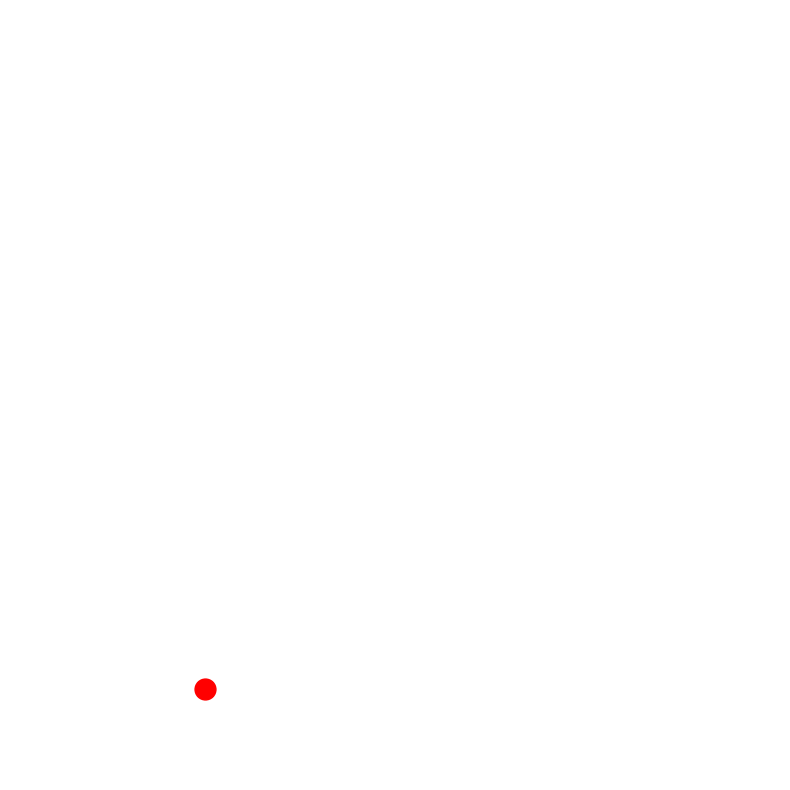

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# turn off axis spines
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# set figure background opacity (alpha) to 0
fig.patch.set_alpha(0.0)

fig.tight_layout()

(pt,) = ax.plot([], [], linestyle="none", marker="o", ms=15, color="r")

trails = []
for i, alpha in enumerate(np.linspace(1.0, 0, n_trails)):
    (l,) = ax.plot(
        [], [], linestyle="none", marker="o", ms=6, alpha=alpha, c="w", zorder=-1000
    )
    trails.append(l)


def init():
    pt.set_data([], [])
    for trail in trails:
        trail.set_data([], [])
    return (pt,) + tuple(trails)


def update(i):
    ix = i - n_trails

    pt.set_data(x[i], y[i])
    for j, trail in zip(range(len(trails))[::-1], trails):
        if ix + j < 0:
            continue
        trail.set_data(x[ix + j], y[ix + j])
    return (pt,) + tuple(trails)


ani = animation.FuncAnimation(
    fig, update, n_frames, init_func=init, interval=20, blit=True
)

ani.save(f"removethis.gif")